In [1]:
# Import all needed libraries/packages

from array import array # used only for input processing
import struct # used only for input processing

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
# Method to import and decode the training/testing data
def decode(p1,p2,p3,p4):
    try:
        label = open(p2, 'rb')
        imgs = open(p1, 'rb')
        test_imgs = open(p3, 'rb')
        test_labels = open(p4, 'rb')
    except Exception:
        print ("FileNotFound")
        exit()
    
    label.read(8)
    labels = list(array("B", label.read()))
    
    test_labels.read(8)
    t_labels = list(array("B", test_labels.read()))
    
    magic, size, rows, cols = struct.unpack(">IIII", imgs.read(16))
    images = [float(i)/float(255) for i in list(array("B", imgs.read()))]
    
    t_magic, t_size, t_rows, t_cols = struct.unpack(">IIII", test_imgs.read(16))
    t_images = [float(i) / float(255) for i in list(array("B", test_imgs.read()))]
    
    train_data=[(images[i:i+784]) for i in range(0,len(images),784)]
    test_data=[(t_images[i:i+784]) for i in range(0,len(t_images),784)]
    
    return train_data, labels, test_data, t_labels

In [3]:
# Specify the files for the training and testing data
train_data, train_labels, test_data, test_labels = decode('train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')

In [4]:
# METHOD: Plots the classification report
def plot_classification_report(cr, title='Classification report \n', with_avg_total=False, cmap=plt.cm.Blues):
    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        # print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        # print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Digits')
    plt.xlabel('Measures')
    plt.show()

In [5]:
# METHOD: Score the model and output evaluation
def show_scoring(model, model_name):
    prediction = model.predict(test_data).astype(np.int32)

    print("Scoring of %s:\n" % (model_name))
    
    print("Accuracy score: %s\n" % model.score(test_data, test_labels))
    
    print("Confusion Matrix:\n")
    print("\t", end="")
    for i in range(10):
        print(i, end="\t")
    print('\n\t', end="")
    for i in range(10):
        print('----', end="\t")
    print()
    for i, row in enumerate(metrics.confusion_matrix(prediction, test_labels, labels=range(10))):
        print("    %d\t|" % i, end="")
        for cell in row:
            print(cell, end="\t")
        print()
    print("\n\n")

    print("Classification report:\n")
    print(metrics.classification_report(prediction, test_labels))

    plot_classification_report(metrics.classification_report(prediction, test_labels))
   

Scoring of Support Vector Machine:

Accuracy score: 0.9446

Confusion Matrix:

	0	1	2	3	4	5	6	7	8	9	
	----	----	----	----	----	----	----	----	----	----	
    0	|967	0	9	1	1	7	9	2	4	8	
    1	|0	1121	1	1	1	4	3	13	7	7	
    2	|2	2	961	15	7	5	4	22	7	0	
    3	|0	2	9	951	0	30	1	5	14	12	
    4	|0	0	10	1	938	7	5	8	8	31	
    5	|5	1	1	15	0	810	9	1	23	6	
    6	|4	4	13	1	7	12	926	0	10	1	
    7	|1	1	9	10	2	2	0	956	6	13	
    8	|1	4	17	11	2	10	1	3	892	7	
    9	|0	0	2	4	24	5	0	18	3	924	



Classification report:

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      1008
          1       0.99      0.97      0.98      1158
          2       0.93      0.94      0.93      1025
          3       0.94      0.93      0.94      1024
          4       0.96      0.93      0.94      1008
          5       0.91      0.93      0.92       871
          6       0.97      0.95      0.96       978
          7       0.93      0.96      0.94      1000
          8       0.9

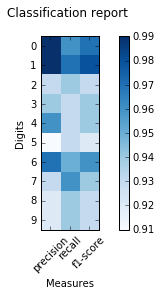

In [78]:
# Run Support Vector Machine
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

clf = svm.SVC(kernel='rbf', 
              gamma='auto', 
              tol=0.001, # Tolerance for stopping criterion
              C=1.0, # Penalty parameter of the error term
              class_weight=None,
              max_iter=-1, 
              random_state=None, 
              shrinking=True)

clf.fit(train_data, train_labels)

show_scoring(clf, "Support Vector Machine")

Scoring of Linear Regression:

Accuracy score: 0.9198

Confusion Matrix:

	0	1	2	3	4	5	6	7	8	9	
	----	----	----	----	----	----	----	----	----	----	
    0	|959	0	9	4	1	10	9	2	10	8	
    1	|0	1112	8	0	2	2	3	7	14	8	
    2	|1	3	920	17	5	0	7	22	5	2	
    3	|2	1	20	918	3	42	2	5	21	13	
    4	|0	0	9	2	915	10	6	8	15	31	
    5	|5	1	4	23	0	769	20	1	28	14	
    6	|6	5	10	4	10	17	907	1	8	0	
    7	|4	1	11	12	2	7	1	951	11	24	
    8	|1	12	37	21	6	28	3	5	850	12	
    9	|2	0	4	9	38	7	0	26	12	897	



Classification report:

             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1012
          1       0.98      0.96      0.97      1156
          2       0.89      0.94      0.91       982
          3       0.91      0.89      0.90      1027
          4       0.93      0.92      0.93       996
          5       0.86      0.89      0.88       865
          6       0.95      0.94      0.94       968
          7       0.93      0.93      0.93      1024
          8    

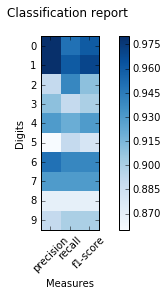

In [6]:
# Run Linear Regression
from sklearn.linear_model import LogisticRegression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

clf = LogisticRegression(solver='newton-cg',
                         penalty='l2',
                         multi_class='ovr',
                         tol=0.0001, # Tolerance for stopping criterion
                         C=1.0, # Inverse of regularization strength
                         max_iter=100, # maximum number of iterations for the solvers to converge
                         class_weight=None, 
                         random_state=None,  
                         n_jobs=-1) # number of cores to use (-1 = no limit)

clf.fit(train_data, train_labels)

show_scoring(clf, "Linear Regression")

Scoring of Multi-layer Perceptron Neural Network:

Accuracy score: 0.9699

Confusion Matrix:

	0	1	2	3	4	5	6	7	8	9	
	----	----	----	----	----	----	----	----	----	----	
    0	|963	0	3	0	0	3	4	1	6	1	
    1	|0	1123	3	0	0	1	2	4	0	3	
    2	|1	2	997	6	4	0	4	12	7	0	
    3	|0	3	5	989	1	15	0	3	11	2	
    4	|4	0	4	0	955	2	8	3	6	14	
    5	|1	0	0	5	1	853	4	0	6	6	
    6	|2	2	3	0	3	5	930	0	4	2	
    7	|3	1	6	3	1	3	2	996	3	9	
    8	|3	4	10	5	1	7	4	2	929	8	
    9	|3	0	1	2	16	3	0	7	2	964	



Classification report:

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       981
          1       0.99      0.99      0.99      1136
          2       0.97      0.97      0.97      1033
          3       0.98      0.96      0.97      1029
          4       0.97      0.96      0.97       996
          5       0.96      0.97      0.96       876
          6       0.97      0.98      0.97       951
          7       0.97      0.97      0.97      1027
          8       0.

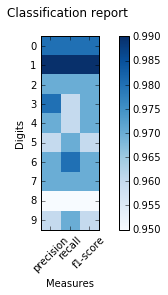

In [9]:
from sklearn.neural_network import MLPClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=(60), # tuple with hidden layers, ith element is #neurons in ith layer eg: (10,30,5)
                    tol=0.0001, # Tolerance for stopping criterion
                    learning_rate='constant', # Learning rate schedule for weight updates {‘constant’, ‘invscaling’, ‘adaptive’}
                    activation='relu', 
                    alpha=1e-05, # L2 penalty (regularization term) parameter.
                    beta_1=0.9, 
                    beta_2=0.999, 
                    early_stopping=False, 
                    epsilon=1e-08, 
                    learning_rate_init=0.001, # Initial learning rate controls the step-size in updating the weights.
                    max_iter=200, # Maximum iterations, solver iterates until convergence (tol) or this number of iterations
                    random_state=None)

clf.fit(train_data, train_labels)

show_scoring(clf, "Multi-layer Perceptron Neural Network")